# Part I - (Exploration of Prosper Loans DataSet)
## by (Sarah Mitchell)

## Introduction
- This data set is of Prosper Loans has an abundance of information. The sections of the data I am interested in is Rates, APRs, Credit Scores, Terms, Income, Yields, Fees, Loans Status to name a few. I want to see how they all corelate off of one another. Does Prosper make a higher yield off of 'A' credit with more money borrowed or on 'E' credit with less money borrowed. What is the average amount someone may borrow? The only way to answer these questions is the explore the data.



## Preliminary Wrangling


In [33]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.core.display import HTML
from nltk.corpus import reuters
import nltk
import PIL.Image as Image



%matplotlib inline

In [34]:
loans = pd.read_csv('prosperLoanData.csv')

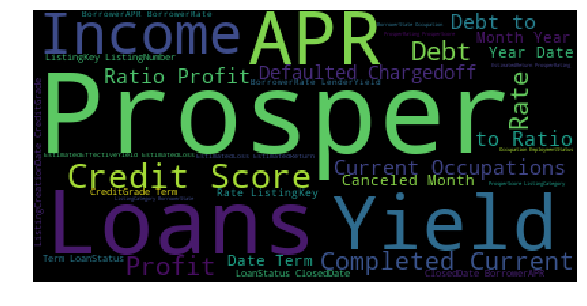

In [3]:
plt.figure(figsize = [10,5])
text = open('prospercloud.txt').read()
wc = WordCloud(stopwords = ['False','True']).generate(text)

plt.imshow(wc)
plt. axis("off")
plt.show()

In [4]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loans.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
loans.shape

(113937, 81)

In [7]:
loans.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [8]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [9]:
# Convert 'ListingCreationDate' type from str to datetime 
loans['LoanOriginationDate']=pd.to_datetime(loans['LoanOriginationDate'])

# Extract date information from ListingCreationDate column
loans['date'] = loans['LoanOriginationDate'].dt.date

# Extract year information from ListingCreationDate column
loans['year']= loans['LoanOriginationDate'].dt.year

# Extract month information from ListingCreationDate column
loans['month']= loans['LoanOriginationDate'].dt.month

# Convert 'date' type from str to datetime 
loans['date']=pd.to_datetime(loans['date'])


In [10]:
# Cleaning income - droping 'not displayed'

loans['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

ordinals = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinals)
loans['IncomeRange'] = loans['IncomeRange'].astype(ordered_var)

In [11]:
# Cleaning the Credit Rates 

rates = ['AA', 'A', 'B', 'C', 'D', 'E']

ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rates)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_var)

### What is the structure of your dataset?

- This data set has 113,937 listing in it,with 81 variables on each loan. Some of these variables include loan terms, borrower APR and rates, lender yeild, and others. This data set contains the information to see if Prosper has a positive yeild on low income houses or how much the lower APRs really benefit Prospers yeild.

- Terms: 12 Months, 24 Months, 36 Months, 48 Months, 60  Months
- APR: 0.007, 0.156, 0.210, 0.284, 0.512
- Rates: 0.00, 0.134, 0.184, 0.250, 0.500

### What is/are the main feature(s) of interest in your dataset?

- Would predict that the higher rates would have a higher yeild. Although with a longer term and lower rate would there be a large differance? Does a lower credit score have a higher collection fees? Does Prosper have a higher yield on 'AA' credit vs 'E' credit?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- The features I will look into first is the terms, rates, and yields. Then I will dive into the collections and losses. It will be best to look at sections individually to see how the data is logged then to start compare the different sections to see how they corrrelate.

## Univariate Exploration

- In this section I will look credit score, income, the original amount, and the month payment, different fees, employment status, and loan status. I want to see how the numbers are distributed.

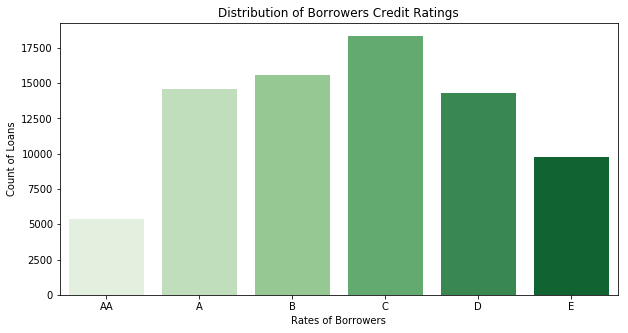

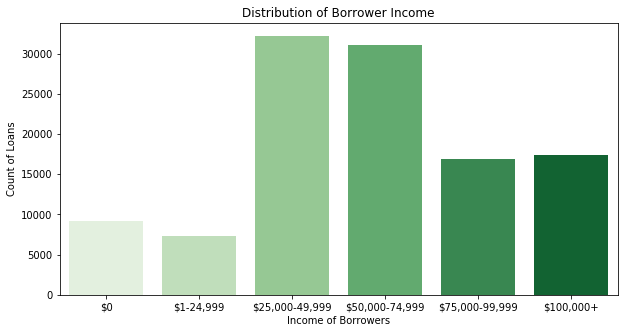

In [12]:
# Looking at see the number of loans each credit score has.

plt.figure(figsize = [10, 5])
sns.countplot(data = loans, x = 'ProsperRating (Alpha)', palette = sns.color_palette(palette='Greens'))

plt.xlabel('Rates of Borrowers')
plt.ylabel('Count of Loans')
plt.title('Distribution of Borrowers Credit Ratings');

#Looking to see the number of loans compared to the income the borrower has.

loans['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

income = ['$0', '$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
income_var = pd.api.types.CategoricalDtype(ordered = True, categories = income)
loans['IncomeRange'] = loans['IncomeRange'].astype(income_var)

plt.figure(figsize = [10, 5])
sns.countplot(data = loans, x = 'IncomeRange', palette = "Greens")
plt.ylabel('Count of Loans')
plt.xlabel('Income of Borrowers')
plt.title('Distribution of Borrower Income');


- In the credit rating chart, the credit scores range from 'AA' to 'E'. 'AA' is the highest credit score and 'E' is the lowest credit score. With 'C' as an average credit score, it is not surprising to see the 'C' credit score have the highest amount in loans. 'AA' is the lowest and 'E', even the lowest credit score, still has a large number of loans. The lower credit scores will have higher rates, which in turn means a higher yield for Prosper.

- In the borrower income chart, you can see the average income ranges from 25,000 - 74,999. Prosper does most of their loans with the average income borrower. In the middle range is income over 75,000, which still does a large number of loans. The lower income being 24,999 and lower does some loans but it is significantly lower than the other tiers of income.

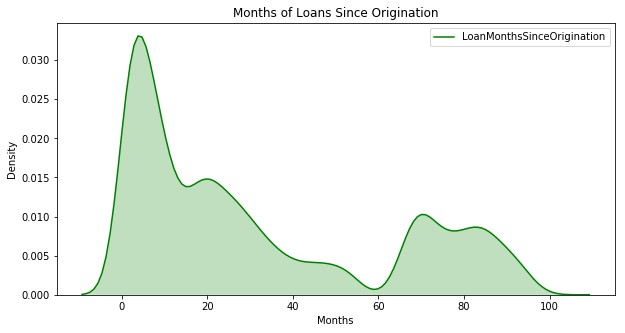

In [13]:
# Looking at the amount of money the loans start with.

plt.figure(figsize = [10, 5])
sns.kdeplot(loans['LoanMonthsSinceOrigination'], shade=True, color = 'Green')
plt.ylabel('Density')
plt.xlabel('Months')
plt.title('Months of Loans Since Origination');

- This chart shows the veriations terms of the loans. As you can see 30% loans are paid off around the 12 month mark. There are some longer term loans as expected, although a large number of loans for paid off within the 5 year mark.

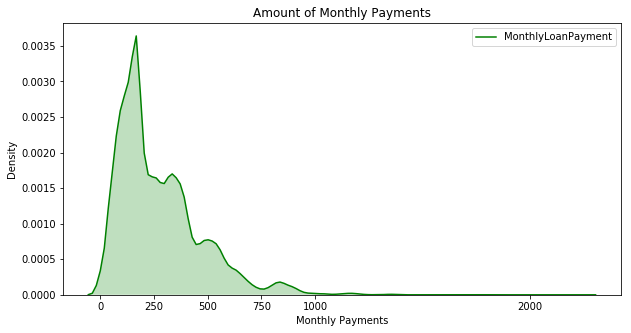

In [14]:
# Looking at the amount of the monthly payments for the loans

plt.figure(figsize = [10, 5])
sns.kdeplot(loans['MonthlyLoanPayment'], shade=True, color= 'Green')
ticks = [0, 250, 500, 750, 1000, 2000]
plt.ylabel('Density')
plt.xlabel('Monthly Payments')
plt.title('Amount of Monthly Payments')
plt.xticks(ticks);

- This chart show the amount of monthly payments. Around 35% of the monthly payments are right under 250. After 250 amount of the larger payment continuously get lower.

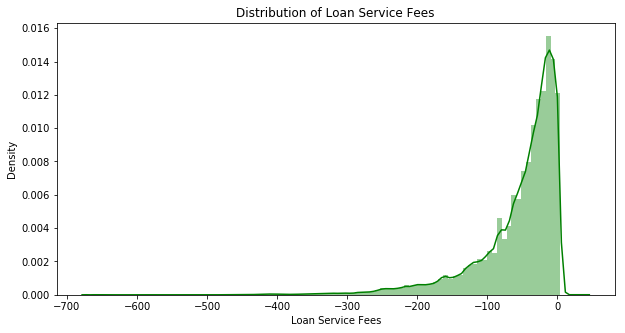

In [15]:
# Looking at the loan service fees

plt.figure(figsize = [10,5])
sns.distplot(loans.LP_ServiceFees , kde = True, bins = 100, color ='Green')
plt.title('Distribution of Loan Service Fees')
plt.ylabel('Density')
plt.xlabel('Loan Service Fees');


- In this loan service fee chart, you can see most of the fees stay under 100 dollars. There are some that are higher but very few over the 200 dollare mark.

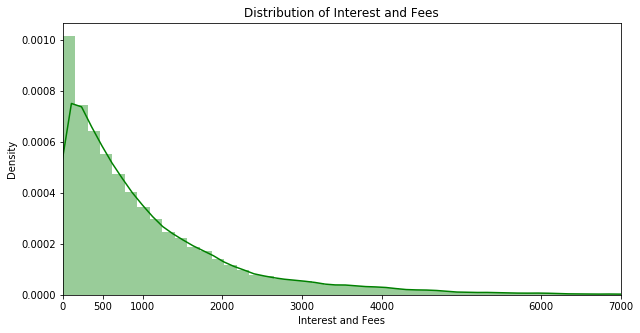

In [16]:
# Looking at interest and fees

plt.figure(figsize = [10,5])
sns.distplot(loans.LP_InterestandFees , kde = True, bins = 100, color ='Green')
ticks = [0, 500, 1000, 2000, 3000, 4000, 6000, 7000]
plt.xlim(0, 7000)
plt.title('Distribution of Interest and Fees')
plt.ylabel('Density')
plt.xlabel('Interest and Fees')
plt.xticks(ticks);

- In the interest and fees chart, you can see Prosper has profited up to  around 6000 dollars in fees. Alothough most are under 1000 dollars. 

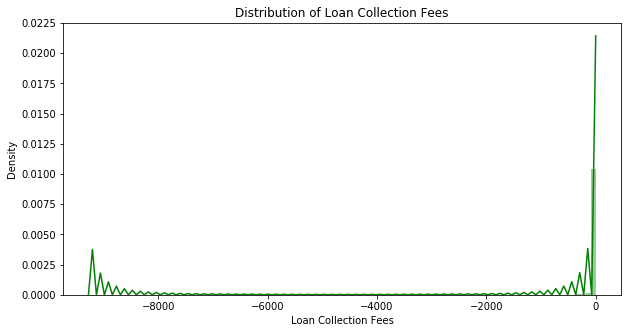

In [17]:
# Looking at the collection fees

plt.figure(figsize = [10,5])
sns.distplot(loans.LP_CollectionFees , kde = True, bins = 100, color ='Green')
plt.title('Distribution of Loan Collection Fees')
plt.ylabel('Density')
plt.xlabel('Loan Collection Fees');

- In collection fees chart is interesting. Prosper shows the usual small collection fees under 1000 dollars. The middle range has minimal fees. On the high end there are fees well over 8000 dollars. 

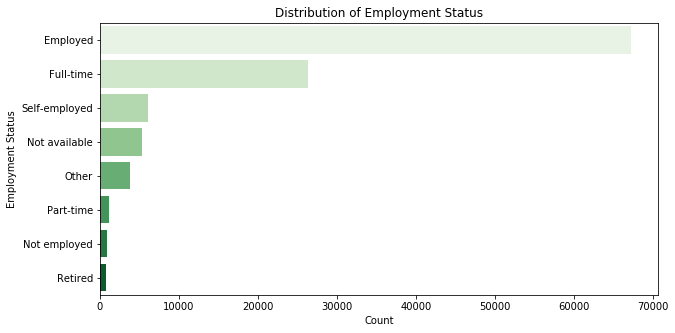

In [18]:
# Looking at emplotment statuses

plt.figure(figsize = [10, 5])
sns.countplot(data = loans, y = 'EmploymentStatus', palette = "Greens",order=loans['EmploymentStatus'].value_counts().index)
plt.ylabel('Employment Status')
plt.xlabel('Count')
plt.title('Distribution of Employment Status');

- In the employment status chart, you can see almost 7000 borrowers are employed and almost 3000 of those are employed full time. The lowest status it retired borrowers then the un-employed.

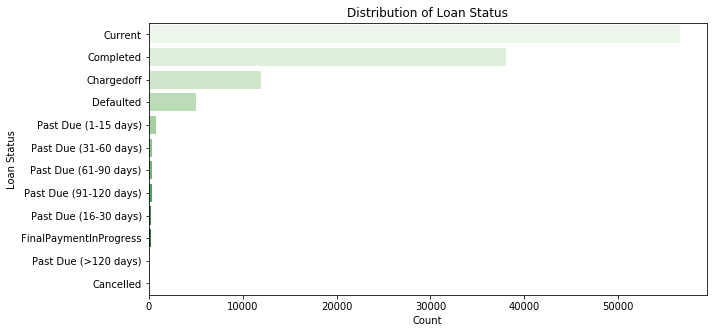

In [19]:
# Looking at the loan status of all loans

plt.figure(figsize = [10, 5])
sns.countplot(data = loans, y = 'LoanStatus', palette = "Greens",order=loans['LoanStatus'].value_counts().index)
plt.ylabel('Loan Status')
plt.xlabel('Count')
plt.title('Distribution of Loan Status');

- In this loan status count, you can see there are over 5000 current loans, around 4000 completed loans, under 1500 chargedoff loand, and under 1000 defaulted loans. There are some late payment which is expected.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- I found it interesting that the average credit scores 'B' and 'C' borrowers also had the average income of 25,000 - 75,000. I did the rates and income columns before looking at that.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The unusual feature I found was the collection fees. I was surprised at the distribution of them. How there was plenty smaller and then it jumped to over 8,000. I want to look into the mount of charged off loans also to see if that is the factor in the collection fees.

## Bivariate Exploration

- Here I want to explore the Borrower Rates, Yields, and differences in the years. I also want to compare Credit Scores with Incomes. I want to look at the amount of the Original Loans and what the rates were. Lastly how the rates change over the months. I am interested in the correlation of hows it all works together to credit a profit for Prosper.

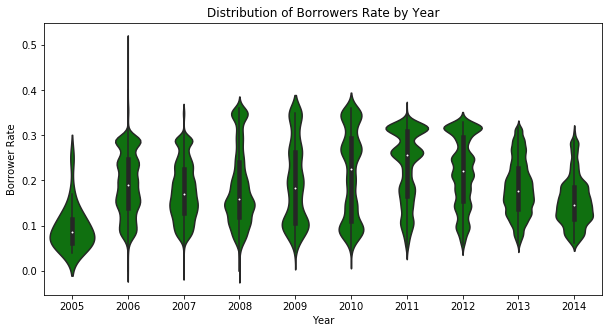

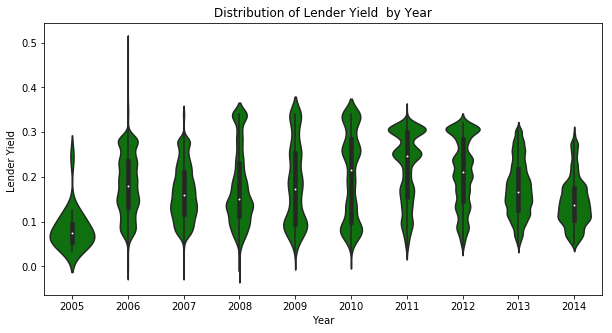

In [20]:
# Looking at the borrowers rate vs the years and lenders yield vs year

plt.figure(figsize = [10, 5])
sns.violinplot(data = loans, x ='year', y ='BorrowerRate', color = 'G')
plt.title('Distribution of Borrowers Rate by Year')
plt.ylabel('Borrower Rate')
plt.xlabel('Year');

plt.figure(figsize = [10, 5])
sns.violinplot(data = loans, x ='year', y ='LenderYield', color = 'G')
plt.title('Distribution of Lender Yield  by Year')
plt.ylabel('Lender Yield ')
plt.xlabel('Year');

- In this borrowers rate by the years, you can see that the rates were higher as in 2008, 2009, and 2010, the number of loans went down. The number of loans were the largest when the rate was at it's lowest in 2005.

- In the lenders yield by the year, you can see not much changed from the rate by year chart. the yield shows slightly smaller than the rate chart. 

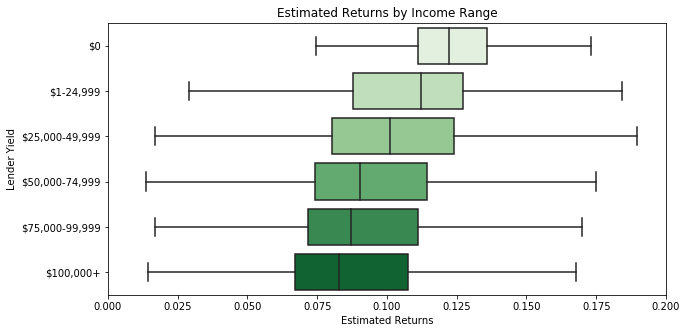

In [21]:
# Looking at estimated return of income range 

plt.figure(figsize = [10, 5])

plt.plot(1, 1, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data = loans, y = 'IncomeRange', x = 'EstimatedReturn', palette = "Greens", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Lender Yield')
plt.xlabel('Estimated Returns')

plt.title('Estimated Returns by Income Range');

- In this esitmated returns chart, you can see the the estimated yield goes higher with lower the borrowers income.

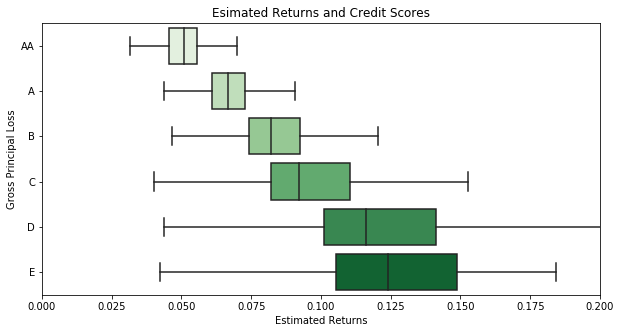

In [22]:
# Looking at estimated return and Credit Score
plt.figure(figsize = [10, 5])

plt.plot(1, 1, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data = loans, y = 'ProsperRating (Alpha)', x = 'EstimatedReturn', palette = "Greens", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Gross Principal Loss')
plt.xlabel('Estimated Returns')
plt.title('Esimated Returns and Credit Scores');

- In this estimated returns vs credit score chart, there is a large difference between 'AA' and 'E' credit scores. The 'E' credit score has the higher rates and Prosper has a much larger profit on it.

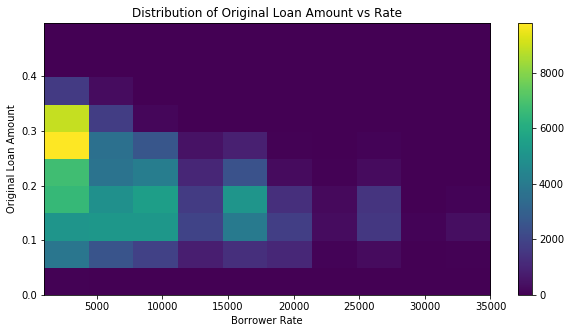

In [23]:
# Looking at loan amount vs rate

plt.figure(figsize = [10, 5])

plt.subplot(1, 1, 1)
plt.hist2d(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerRate')
plt.colorbar()
plt.xlabel('Borrower Rate')
plt.ylabel('Original Loan Amount')
plt.title('Distribution of Original Loan Amount vs Rate');

- In the this loan amount vs rate chart, it is a way to see that that when the rate is around the 3% range there is a increase in the amount borrowed, well over 8000. Then the 2% range in the second rate favord with around 6000 averaging the amoun borrowered.

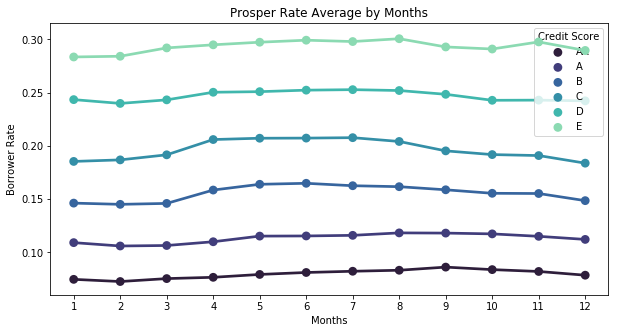

In [24]:
plt.figure(figsize=[10,5])

sns.pointplot(data=loans, x='month', y='BorrowerRate', hue='ProsperRating (Alpha)',
                   palette='mako');
plt.legend(loc=1, title='Credit Score');
plt.title('Prosper Rate Average by Months');
plt.ylabel('Borrower Rate')
plt.xlabel('Months');

- In this rates average by months chart, you can see that the rates can slightly change each month. They do however tend to stay close to where they were to the months before and after eachother. Hence it is a gradual change when the rates do change.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- In this section the rates interested me the most. How the rates effect the yield and how the credt score effect the rate. You can see that the years the rates are high, the amount of money borrowered is lower.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- I found it interersting that Prosper lends less money to borrowers with 'E' credit score, but Prosper has a much higher yield still than 'AA' credit score borrowing more money.

## Multivariate Exploration

- In this section I want to see the loans status. While also looking at rates, credit scores, terms and Prosper's yield.

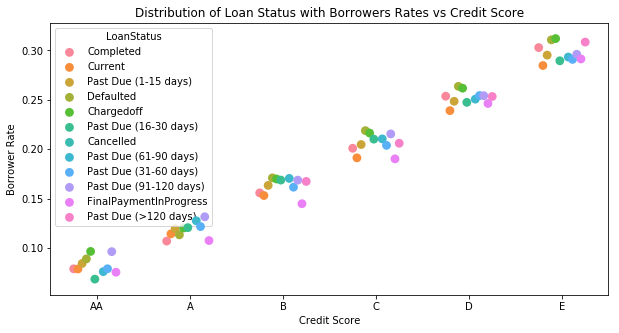

In [25]:
# Looking at the correlation of loan status between rates and credit scores

fig = plt.figure(figsize = [10,5])
ax = sns.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', 
hue ='LoanStatus', ci =None, linestyles = '', dodge = 0.5)
plt.title('Distribution of Loan Status with Borrowers Rates vs Credit Score')
plt.ylabel('Borrower Rate')
plt.xlabel('Credit Score')
plt.show();

- In this loan status chart, it has the correlation of rates and credit scores. You can see the 'AA' scores has less default payments than the 'E' scores, which it is to be expected and why their rates are also much higher. This chart demonstrates that the borrowers credit scores do reflect their payment history therefore giving them an appropriate rate.

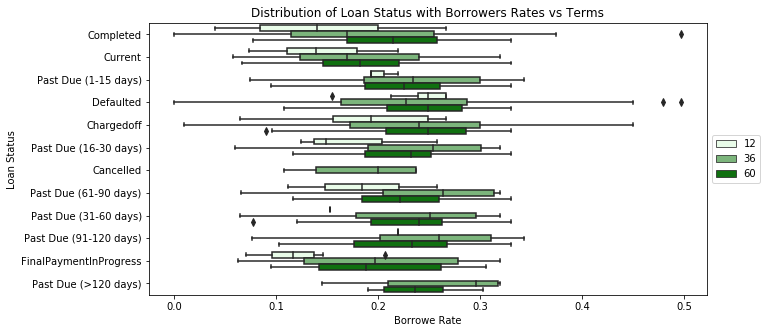

In [26]:
# Looking at the loan status, borrower rates and terms 

plt.figure(figsize=[10,5])

sns.boxplot(data = loans, y = 'LoanStatus', x = 'BorrowerRate', hue = 'Term', color = 'G')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.title('Distribution of Loan Status with Borrowers Rates vs Terms')
plt.xlabel('Borrowe Rate')
plt.ylabel('Loan Status');

- in this loan status with rates vs terms, you can cleary see in loans. This chart shows the current status from completed loans to loans over 120 past due.

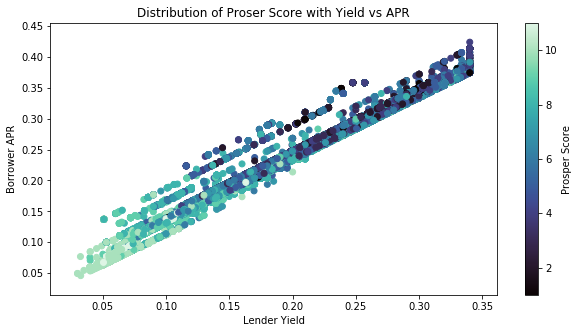

In [27]:
# Looking at the prosper score in correlation between lender yield and borrowers APR

plt.figure(figsize = [10, 5])

plt.scatter(data=loans,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'mako')
plt.colorbar(label = 'Prosper Score');
plt.title('Distribution of Proser Score with Yield vs APR');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

- This score with yield vs APR chart, it is easy to see the higher the APR the the higher the yield. With that the lower the credit score the higher the APR.

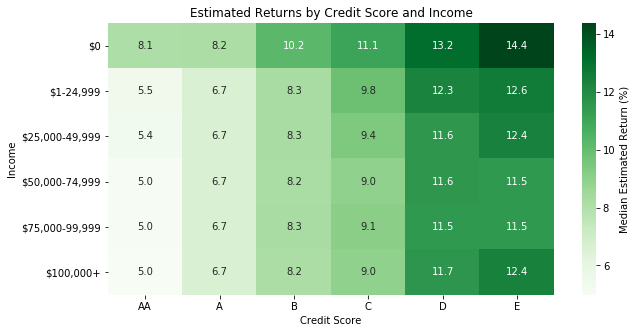

In [28]:
# Looking at average estimated returns

plt.figure(figsize = [10,5])

cat_med = loans.groupby(['ProsperRating (Alpha)', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperRating (Alpha)', values = 'EstimatedReturnMedian')

sns.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Greens", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Credit Score')
plt.ylabel('Income')
plt.title('Estimated Returns by Credit Score and Income');


- In this estimated returns by credit and income chart, you can see that the yield makes a large difference. It is interesting to see that the 'E' with the least amount of income is where Prosper profits the largest return.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- I can see that every credit score has the loan status from well paid to charged off. You can contiune to see Prosper profits on 'E' score borrowers more that 'AA' score borrowers.

### Were there any interesting or surprising interactions between features?

- It looks like the 36 monthterm is the more popular choice. Although the loans with the term of 12 months has minimal defaults.

## Conclusions

- The conclusion I have disocvered in this dataset is that rates and fees are Prospers profit. The rates for 'E' credit score borrowers have a much higher yield than 'AA' credit score borrowers. This is true even though Prosper lends 'E' score borrowers less money. The majority of Prospers customers have average credit scores with average incomes.

- Prosper also makes a large portion of the profits off of fees. They have late fees, collection fees, interest fees and loan fees. They make a profit on all of the and on all borrowers from 'AA' scores to 'E' scores.
